### EDA

In [6]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt
penguins = load_penguins()
sns.set()
sns.set_style('whitegrid')

C:\Users\mcnak\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Body Mass')

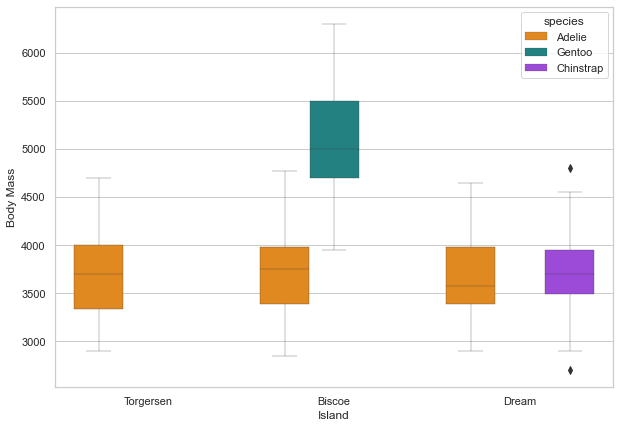

In [2]:
plt.figure(figsize = [10,7])
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = penguins,
            palette=['#FF8C00','#159090','#A034F0'],
            linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')



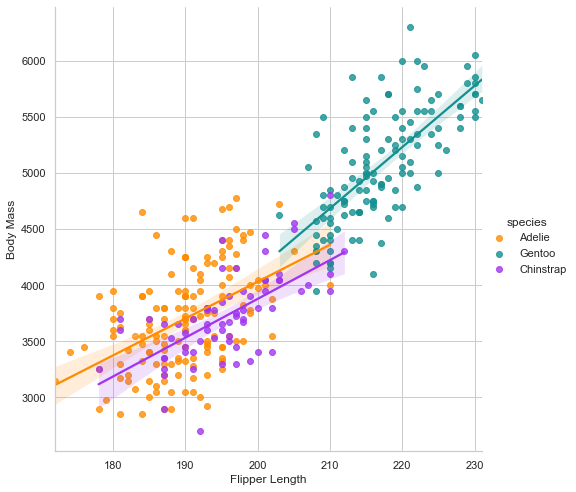

In [3]:
g = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=penguins,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Flipper Length')
g.set_ylabels('Body Mass')

### Machine Learning

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.metrics import confusion_matrix
### To deal with missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier


In [ ]:
X,y = load_penguins(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100,
                                            random_state=0)


In [31]:
imp = IterativeImputer(max_iter=10, random_state=0)
clf = make_pipeline(imp, DecisionTreeClassifier())
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred,labels=['Adelie','Chinstrap','Gentoo'])

array([[47,  1,  0],
       [ 3, 17,  0],
       [ 0,  0, 32]], dtype=int64)